# Preprocesado [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mariaprojas/AI-Project/blob/master/02%20-%20preprocesado.ipynb)

### Importando las librerias necesarias

In [ ]:
#Importando librerias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import find_peaks

### Importando el archivo del dataset desde Google Drive

In [ ]:
!pip install gdown

import gdown

# Define ID 
archivo_id = "1awU-SPr9YEjXorief4_Xf9UYo9IYu12Y"

# Asigna nombre para el archivo en Colab
d1 = "dataset.csv"

# Construye el enlace de descarga del archivo
enlace_descarga = "https://drive.google.com/uc?id=" + archivo_id

# Descarga el archivo desde el enlace de descarga y lo guarda en Colab
gdown.download(enlace_descarga, d1, quiet=False)

# Lee el archivo y lo almacena en un data frame
d = pd.read_csv("dataset.csv") 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Downloading...
From: https://drive.google.com/uc?id=1awU-SPr9YEjXorief4_Xf9UYo9IYu12Y
To: /content/dataset.csv
100%|██████████| 462M/462M [00:03<00:00, 149MB/s]
<ipython-input-34-3d822cf542df>:18: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv("dataset.csv")


###Depuración por condiciones 

#### 1. No había información sobre el contenido de la columna




Marcadas en el apartado "Data" de la competencia de Kaggle como NA (Columna no disponible o autodocumentada)

In [ ]:
d = d.drop(['RtpStateBitfield','IsSxsPassiveMode', 'AVProductsInstalled','AVProductsEnabled','IeVerIdentifier','Census_OEMNameIdentifier','Census_OEMModelIdentifier','Census_ProcessorManufacturerIdentifier','Census_ProcessorModelIdentifier','Census_InternalBatteryType','Census_InternalBatteryNumberOfCharges','Census_OSInstallLanguageIdentifier','Census_OSUILocaleIdentifier','Census_IsFlightingInternal', 'Census_ThresholdOptIn','Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier','Census_IsWIMBootEnabled','Wdft_RegionIdentifier'], axis=1)

#### 2. Cantidad de datos faltantes en la columna es mayor al 80%.

In [ ]:
k = d.isna().sum()
k1 = k[k!=0]
k1

DefaultBrowsersIdentifier                            761366
AVProductStatesIdentifier                              3260
CityIdentifier                                        29094
OrganizationIdentifier                               246563
GeoNameIdentifier                                        27
OsBuildLab                                                2
IsProtected                                            3247
PuaMode                                              799792
SMode                                                 47949
SmartScreen                                          284086
Firewall                                               8373
UacLuaenable                                           1011
Census_MDC2FormFactor                                    32
Census_DeviceFamily                                      32
Census_ProcessorCoreCount                              3726
Census_ProcessorClass                                796736
Census_PrimaryDiskTotalCapacity         

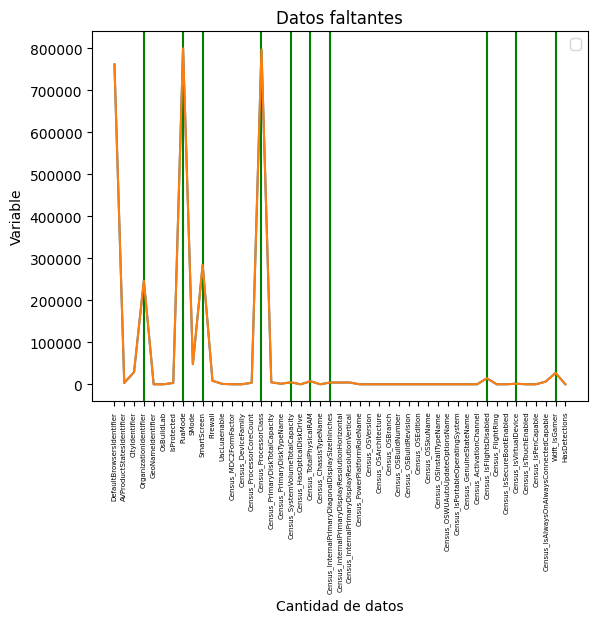

In [ ]:
fig, ax = plt.subplots()
ax.plot(k1)
plt.xticks(rotation=90)
plt.xticks(fontsize=5)

picos, _ = find_peaks(k1) 

# Añadir líneas verticales en los picos
for p in picos:
    ax.axvline(x=p, color='g')

# Configurar los ejes y las etiquetas
plt.xlabel('Cantidad de datos')
plt.ylabel('Variable')
plt.title('Datos faltantes')
plt.legend()


plt.plot(k1)


Se han truncado las últimas 5000 líneas del flujo de salida.
For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.loc[k[c] == v, "HasDetections"], label=v)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-38-7ed683019a78>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(k.loc[k[c] == v, "HasDetections"], label=v)
/usr/local/lib/python3

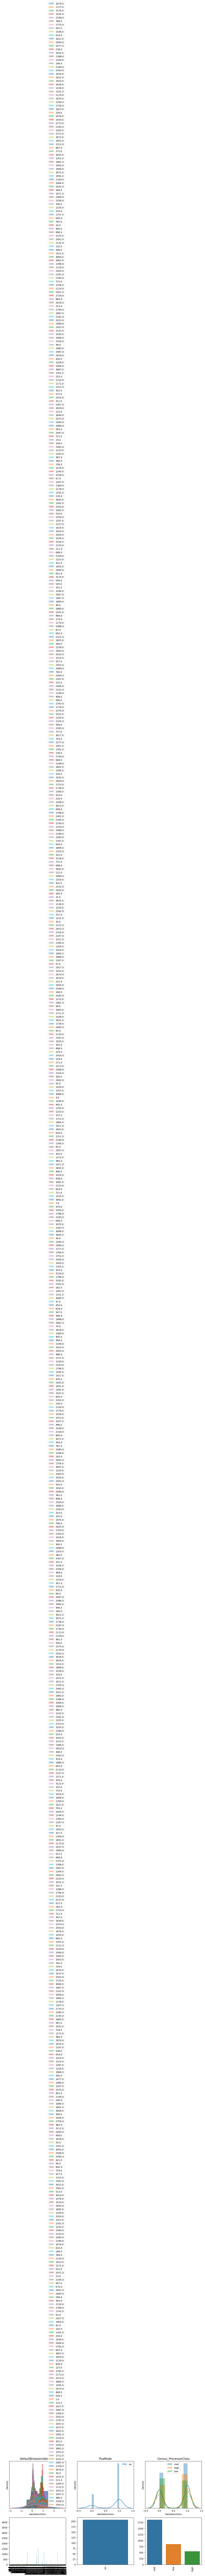

In [ ]:
plt.figure(figsize=(20,8))
for i,c in enumerate(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass']):    
    plt.subplot(2,4,i+1)
    k=d[[c,"HasDetections"]].dropna()
    for v in k[c].unique():
        sns.distplot(k.loc[k[c] == v, "HasDetections"], label=v)
        plt.title(c)
    plt.yticks([])
    plt.legend()

    plt.subplot(2, 4, i+5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation=90,fontsize=10)

Se elimina la columna PuaMode debido a que el porcentaje de datos faltantes supera el 97% y su distribución con relación a la variable objetivo no se considera relevante. De forma similar ocurre en las otras dos columnas.

In [ ]:
d = d.drop(['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass'],axis=1)

#### 3. Columnas que contienen un único valor para todas las filas.

In [ ]:
d.columns[d.nunique() == 1]

Index([], dtype='object')

#### 4. Columnas repetidas o con información similar a otras.

<ipython-input-41-e8f5c3655a44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d.corr()


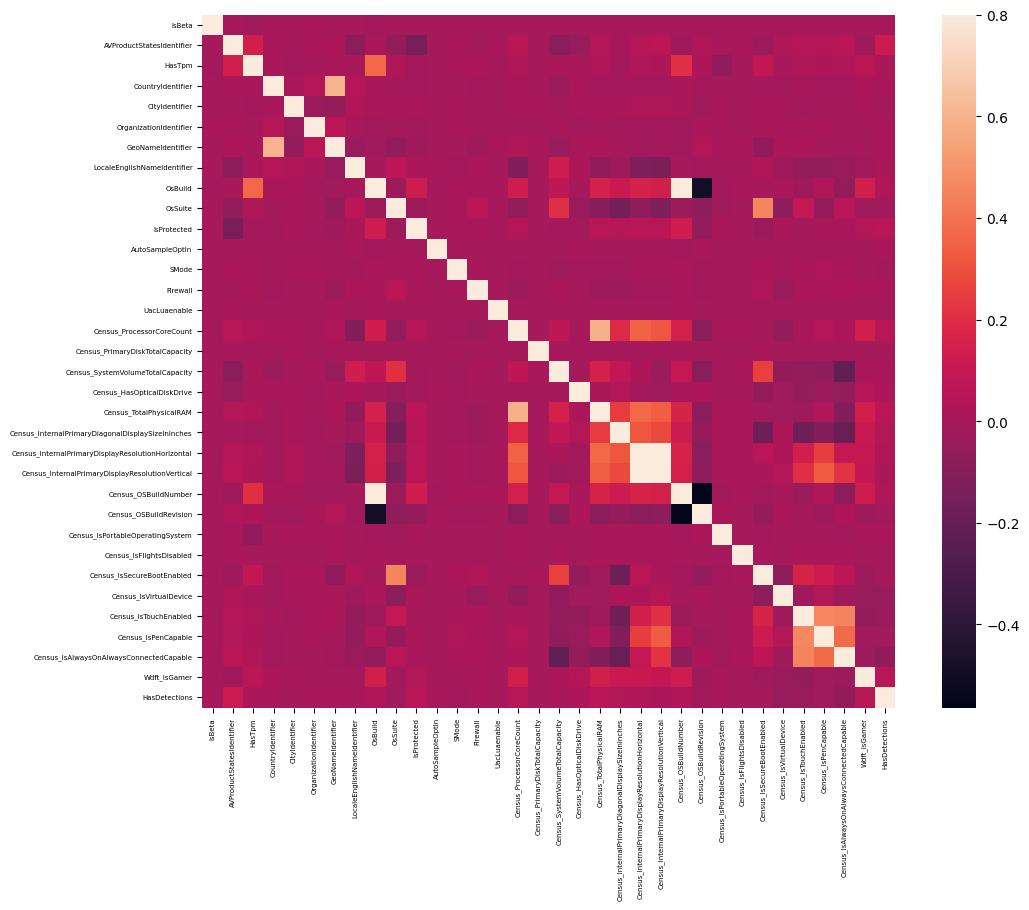

In [ ]:
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
sns.heatmap(corrmat, vmax=.8, square=True);

Se observa que OSBuild y CensusOSBuildNumber tiene información similar.

In [ ]:
d = d.drop(['Census_OSBuildNumber'],axis=1)

In [ ]:
print(d.shape)

(800000, 60)


In [ ]:
k = d.isna().sum()
k1 = k[k!=0]
k1.sum()

708148

Para mantener los parametros requeridos por el ejercicio academico generamos 3% más de datos faltantes

In [ ]:
# Fracción de elementos para eliminar 
frac = 0.036
num_elementos_a_eliminar = int(frac * d.size)

# Generar índices aleatorios de los elementos a eliminar
indices_a_eliminar = np.random.choice(d.size, num_elementos_a_eliminar, replace=False)

# Convertir los índices a coordenadas de filas y columnas en el DataFrame
filas = indices_a_eliminar // d.shape[1]
columnas = indices_a_eliminar % d.shape[1]

# Establecer los elementos seleccionados en NaN o en otro valor específico
for fila, columna in zip(filas, columnas):
    d.at[d.index[fila], d.columns[columna]] = np.nan

In [ ]:
k = d.isna().sum()
k1 = k[k!=0]
k1.sum()

2410395

### Reparación de datos faltantes

###**En proceso**
 Remitirse a los archivos 

*    "05 - pruebas recuperación variables numericas"
*   "06 - pruebas recuperación variables categoricas"


 